In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt

## Многомерный статистический анализ. Линейная регрессия

### Задача 1

Даны значения величины заработной платы заемщиков банка (salary) и значения их поведенческого кредитного скоринга (scoring):

In [2]:
salary = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
scoring = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

Возьмём в качестве признака значение salary, а в качестве целевой переменной - scoring.

1. Найдите коэффициенты линейной регрессии с помощью формул для парной регрессии, а затем с помощью метода наименьших квадратов.

Коэффициенты с помощь формул для парной регрессии находятся следующим образом:
$$
b_{1}=\frac{\overline{y x}-\overline{y} \cdot \overline{x}}{\overline{x^{2}}-(\overline{x})^{2}}, b_{0}=\overline{y}-b_{1} \cdot \overline{x}
$$

In [3]:
b1 = (np.mean(salary * scoring) - np.mean(salary) * np.mean(scoring)) / (np.mean(salary ** 2) - np.mean(salary) ** 2)
b1

2.620538882402765

In [4]:
b0 = np.mean(scoring) - b1 * np.mean(salary)
b0

444.1773573243596

Модель линейной регрессии имеет вид:
$$
scoring=444.18+2.62 \cdot salary
$$

С помощью метода наименьших квадратов коэффициенты находятся следующим образом:
$$
b=\left(salary^{\top} salary\right)^{-1} salary^{\top} scoring
$$

In [5]:
salary_1 = salary.reshape(-1, 1)
scoring_1 = scoring.reshape(-1, 1)

In [6]:
ones = np.ones((salary_1.shape[0], 1))
salary_1 = np.hstack((ones, salary_1))

In [7]:
STS = np.dot(salary_1.T, salary_1)
np.linalg.det(STS)

349464.00000000023

In [8]:
inv_STS = np.linalg.inv(STS)
b = inv_STS.dot(salary_1.T).dot(scoring_1)
b

array([[444.17735732],
       [  2.62053888]])

2. Постройте scatter plot по данным и отметьте на нём прямую линейной регрессии, полученную в п. 1.

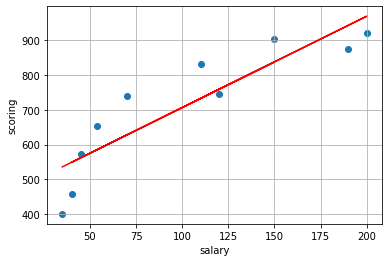

In [9]:
ox = salary
oy = 444.18 + 2.62 * salary

plt.scatter(salary, scoring)
plt.plot(ox, oy, color='red')
plt.ylabel('scoring')
plt.xlabel('salary')
plt.grid()

3. Посчитайте коэффициент детерминации, среднюю ошибку аппроксимации.

Коэффициент детерминации:
$$
R^{2}=\frac{D_{\text {model}}}{D_{y}}
$$

In [10]:
scoring_pred = b0 + b1 * salary

In [11]:
R2 = scoring_pred.var() / scoring.var()
R2

0.7876386635293678

В случае парной регресси:
$$
R^{2}=r_{salary, scoring}^{2}
$$

In [12]:
r2 = np.corrcoef(salary, scoring) ** 2
r2

array([[1.        , 0.78763866],
       [0.78763866, 1.        ]])

Средняя ошибка аппроксимации:
$$
\overline{A}=\frac{1}{n} \sum_{i=1}^{n}\left|\frac{scoring_{i}-scoring\_pred_{i}}{scoring_{i}}\right|
$$

In [13]:
A = np.mean(np.abs((scoring - scoring_pred) / scoring))
A

0.11469251843561709

4. Оцените построенное уравнение регрессии с помощью F-критерия Фишера.

Предположим, что все коэффициенты уравнения равны нулю и исследуем следующую статистику:
$$
T=\frac{R^{2}}{1-R^{2}} \cdot \frac{n-k-1}{k}
$$

In [14]:
k = 1
n = salary.shape[0]

In [15]:
T = (R2 / (1 - R2)) * (n - k - 1)
T

29.67164085966437

критическая область:

In [16]:
alpha = 0.05

F_crit = stats.f.ppf(1 - alpha, k, n - 2)
F_crit

5.317655071578714

Т.к. $T>F_{c r i t}$, заключаем, что уравнение регрессии статистически значимо

5. Оцените значимость получившихся параметров уравнения регрессии и постройте для них доверительные интервалы с помощью t-статистики Стьюдента.

Посчитаем стандартную ошибку:
$$
S_{s l o p e}=\sqrt{\frac{\frac{1}{n-2} \sum_{i=1}^{n}\left(y_{i}-z_{i}\right)^{2}}{\sum_{i=1}^{n}\left(x_{i}-\overline{x}\right)^{2}}}
$$

In [17]:
def standard_error_slope(
        x: np.ndarray,
        y: np.ndarray,
        z: np.ndarray,
) -> float:
    """Стандартная ошибка коэффициента наклона.
    """
    
    n = x.shape[0]
    
    upper = ((y - z) ** 2).sum() / (n - 2)
    lower = ((x - x.mean()) ** 2).sum()
    
    return np.sqrt(upper / lower)

In [18]:
S_slope = standard_error_slope(salary, scoring, scoring_pred)
S_slope

0.48108279568516005

In [19]:
t = stats.t.ppf(1 - alpha / 2, df=8)
t

2.3060041350333704

In [20]:
T = b1 / S_slope
T

5.447168150485579

Значение попало в критическую область, гипотеза о равенстве 0 параметра b1 неверна. Доверительный интервал:

In [21]:
(b1 - t * S_slope, b1 + t * S_slope)

(1.5111599662593718, 3.729917798546158)

In [22]:
def standard_error_intercept(
        x: np.ndarray,
        y: np.ndarray,
        z: np.ndarray,
) -> float:
    """Стандартная ошибка коэффициента сдвига.
    """
    
    return standard_error_slope(x, y, z) * np.sqrt((x ** 2).mean())

In [23]:
S_inter = standard_error_intercept(salary, scoring, scoring_pred)
S_inter

56.46649755068153

In [24]:
T = b0 / S_inter
T

7.866210524668863

Значение также попало в критическую область, доверительный интервал:

In [25]:
(b0 - t * S_inter, b0 + t * S_inter)

(313.9653804816363, 574.3893341670829)

### Задача 2

Посчитать коэффициенты линейной регрессии для т.н. Квартета Энскомба (см. урок 6).

In [26]:
anscombe_dataset = pd.read_csv('anscombe_dataset.csv', index_col='id')

anscombe_dataset

,x1,y1,x2,y2,x3,y3,x4,y4
id,,,,,,,,
0,10.0,8.04,10.0,9.14,10.0,7.46,8.0,6.58
1,8.0,6.95,8.0,8.14,8.0,6.77,8.0,5.76
2,13.0,7.58,13.0,8.74,13.0,12.74,8.0,7.71
3,9.0,8.81,9.0,8.77,9.0,7.11,8.0,8.84
4,11.0,8.33,11.0,9.26,11.0,7.81,8.0,8.47
5,14.0,9.96,14.0,8.10,14.0,8.84,8.0,7.04
6,6.0,7.24,6.0,6.13,6.0,6.08,8.0,5.25
7,4.0,4.26,4.0,3.10,4.0,5.39,19.0,12.50
8,12.0,10.84,12.0,9.13,12.0,8.15,8.0,5.56


In [27]:
def b1_f(x, y):
    b1 = (np.mean(x * y) - np.mean(x) * np.mean(y)) / (np.mean(x ** 2) - np.mean(x) ** 2)
    
    return b1

In [28]:
def b0_f(x, y, b1):
    b0 = np.mean(y) - b1 * np.mean(x)
    
    return b0

In [29]:
b = np.empty((0, 2))
columns = iter(anscombe_dataset.columns)

for column in columns:
    x = anscombe_dataset[column]
    y = anscombe_dataset[next(columns)]
    b1 = b1_f(x, y)
    b0 = b0_f(x, y, b1)
    
    b = np.vstack((b, [b0, b1]))

b

array([[3.00009091, 0.50009091],
       [3.00090909, 0.5       ],
       [3.00245455, 0.49972727],
       [3.00172727, 0.49990909]])